In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [32]:
df = pd.read_csv('Desktop/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [33]:
df.shape

(500, 9)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [35]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [45]:
df.columns = df.columns.str.replace(' ','_')

In [46]:
df.head()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [107]:
x = np.asanyarray(df['GRE_Score'])
# y = df['chance']

In [108]:
y = np.asanyarray(df['Chance_of_Admit_'])

<IPython.core.display.Javascript object>


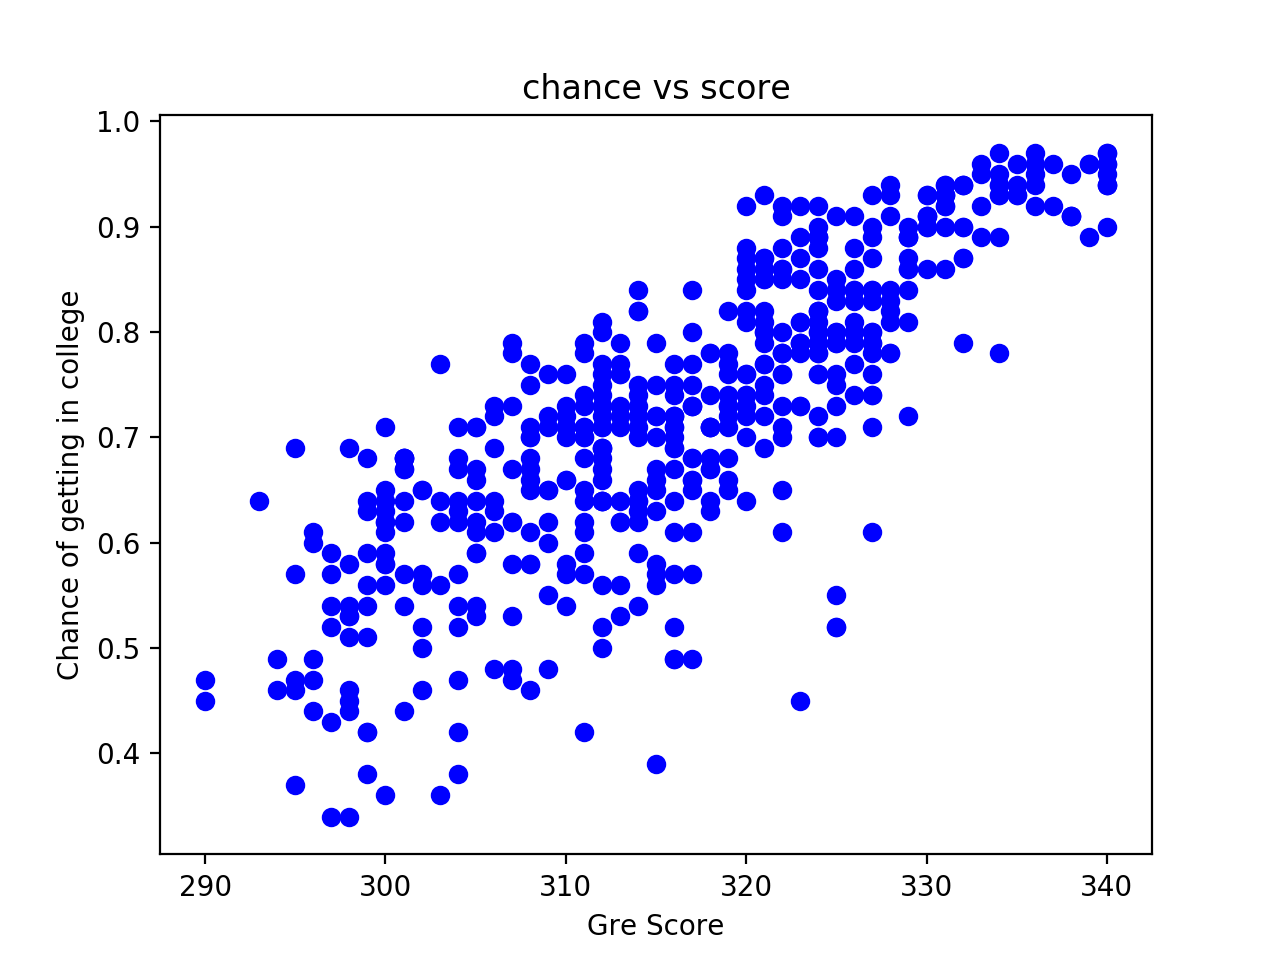

<IPython.core.display.Javascript object>


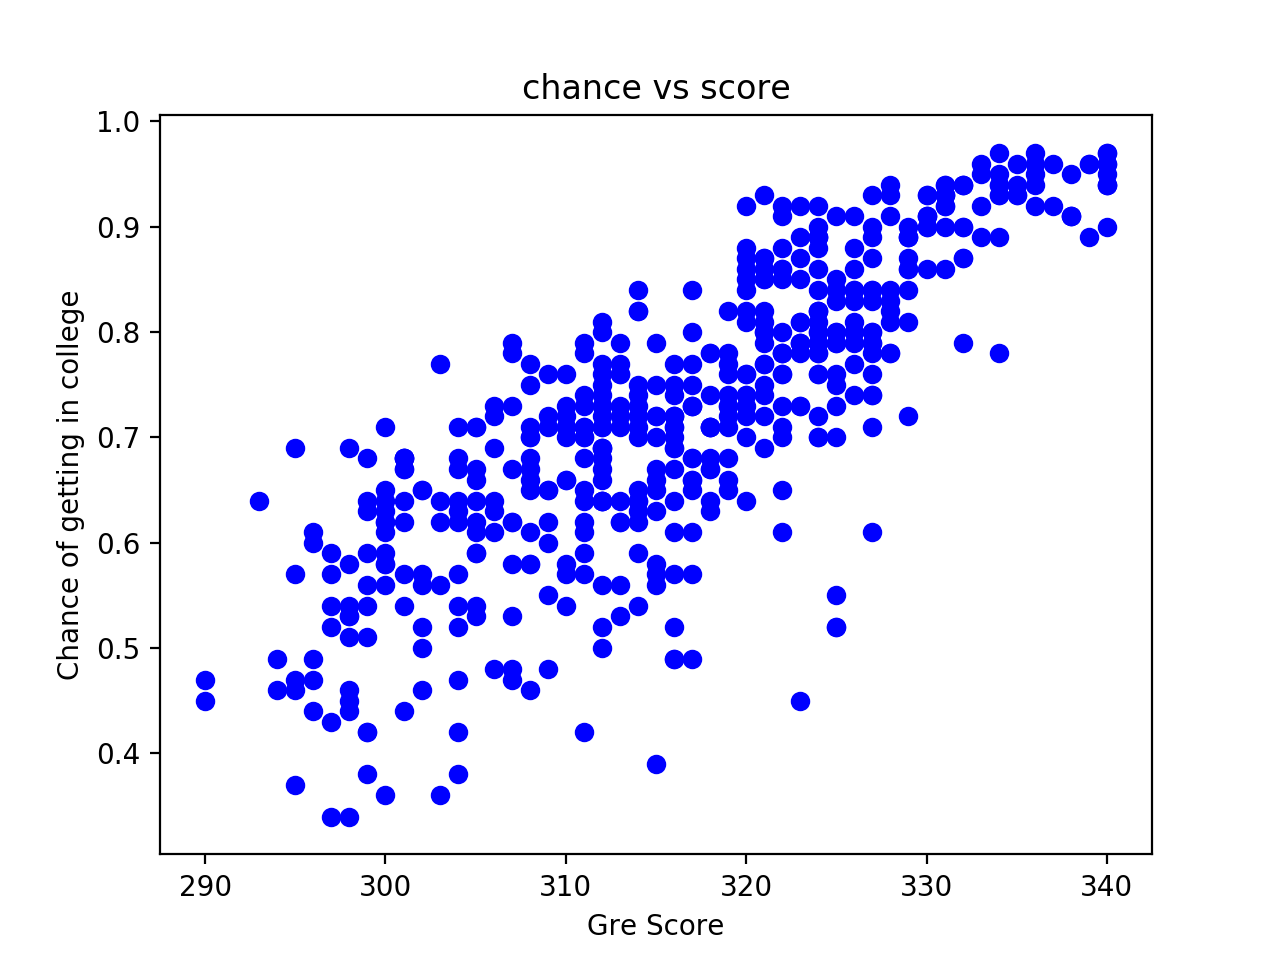

In [109]:
plt.figure()

In [110]:
plt.scatter(x, y, color = 'blue')

In [132]:
plt.xlabel("Gre Score")
plt.ylabel("Chance of getting in college")
plt.title("chance vs score")

Text(0.5, 1, 'chance vs score')

In [133]:
plt.show()

In [134]:
df2 = df[['GRE_Score','Chance_of_Admit_']]

In [135]:
df2

,GRE_Score,Chance_of_Admit_
0,337,0.92
1,324,0.76
2,316,0.72
3,322,0.80
4,314,0.65
...,...,...
495,332,0.87
496,337,0.96
497,330,0.93
498,312,0.73


In [136]:
msk = np.random.rand(len(df)) < 0.8
train = df2[msk]
test = df2[~msk]

In [138]:
from sklearn import linear_model
regression = linear_model.LinearRegression()

In [141]:
train_x = np.asanyarray(df2[['GRE_Score']])
train_y = np.asanyarray(df2[['Chance_of_Admit_']])

In [142]:
regression.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
regression.coef_

array([[0.01012587]])

In [144]:
regression.intercept_

array([-2.48281467])

<IPython.core.display.Javascript object>


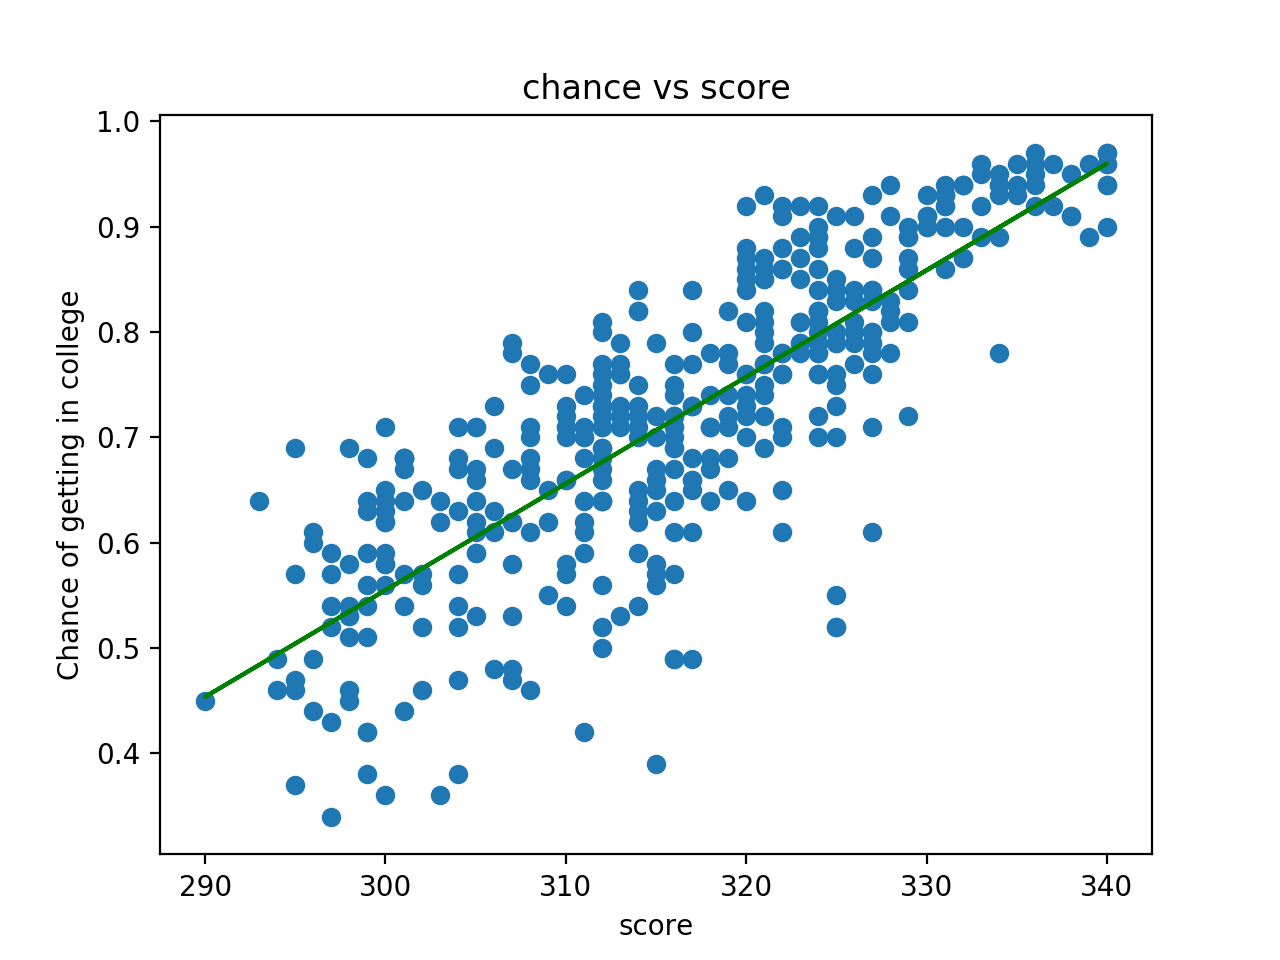

<IPython.core.display.Javascript object>


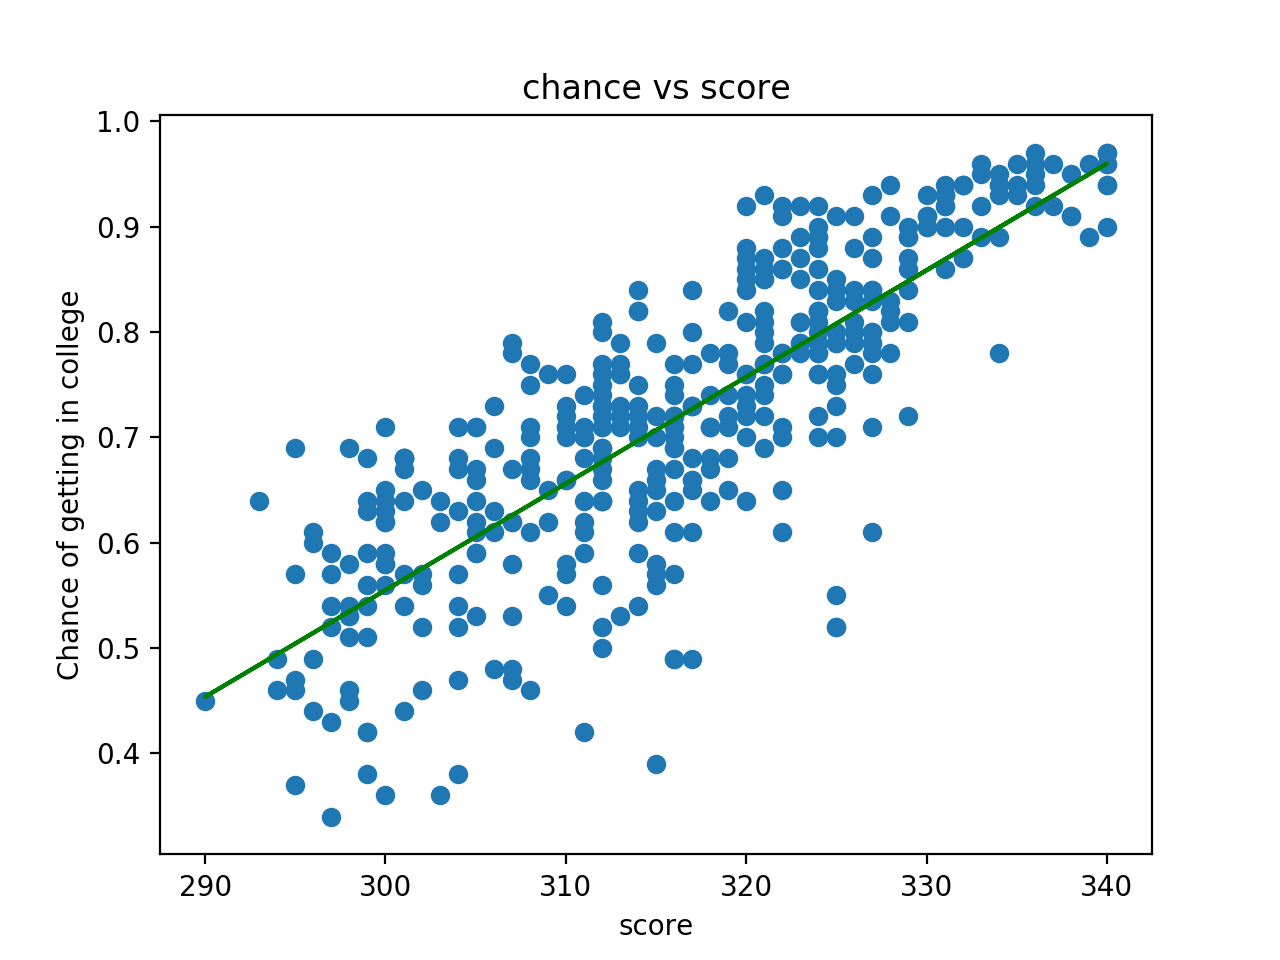

In [170]:
plt.figure()

In [171]:
plt.scatter(train.GRE_Score, train.Chance_of_Admit_)

In [172]:
plt.plot(train_x , train_x * regression.coef_[0][0] + regression.intercept_, color = 'green')

In [173]:
plt.ylabel("Chance of getting in college")
plt.title("chance vs score")

Text(0.5, 1, 'chance vs score')

In [174]:
plt.xlabel("score")

Text(0.5, 47.04444444444444, 'score')

In [169]:
plt.show()

In [155]:
test.head()

,GRE_Score,Chance_of_Admit_
3,322,0.80
8,302,0.50
9,323,0.45
12,328,0.78
18,318,0.63


In [156]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['GRE_Score']])
test_y = np.asanyarray(test[['Chance_of_Admit_']])

In [157]:
test_y_ = regression.predict(test_x)

In [158]:
np.mean(np.absolute(test_y_ - test_y))

0.06156156043748633

In [159]:
# Residual mean sqaure error
np.mean((test_y_ - test_y) ** 2)

0.006556064232602316

In [161]:
r2_score(test_y_ , test_y)

0.45976920834911994

<IPython.core.display.Javascript object>


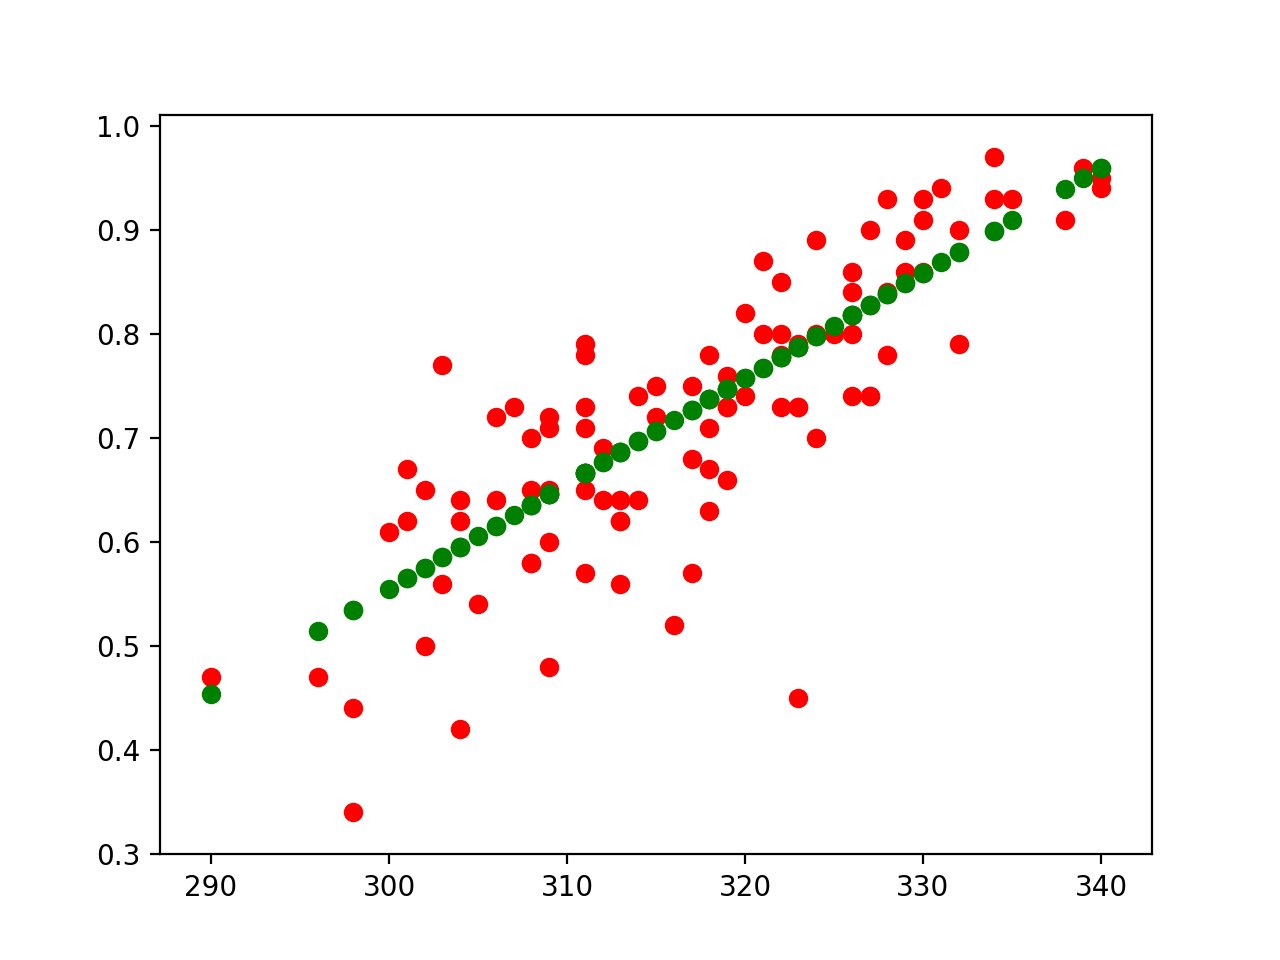

In [163]:
plt.figure()
plt.scatter(test_x, test_y, color = 'red')
plt.scatter(test_x, test_y_, color = 'green')
